Assignment 2 - EP20BTECH11004

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Part 1 - Gray Scale Point Operations

In [6]:
folder = './figs/'
filenames = ['5.1.11.tiff', '5.1.12.tiff', '5.1.13.tiff']
files = [folder + file for file in filenames]
I = np.asarray(Image.open(files[1]).convert('L')).astype(int)

def hist(I):
    X = np.zeros(256, dtype = int)
    for j in I.flatten():
        X[j] += 1
    return X

Q1

a)

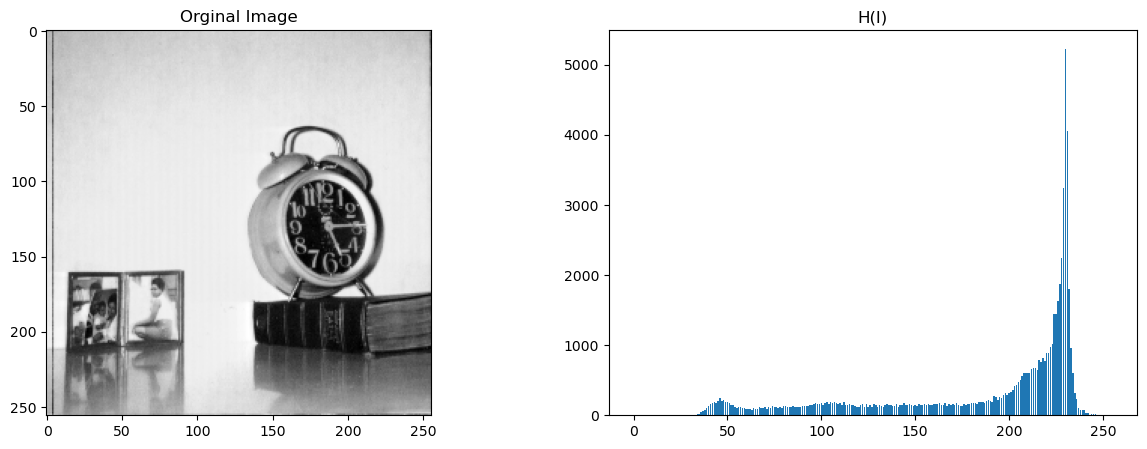

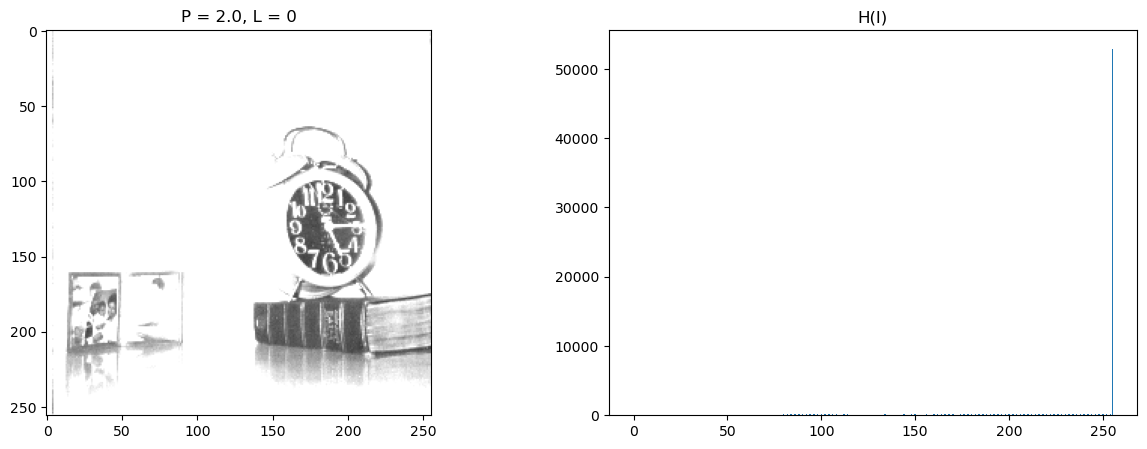

In [14]:
P = float(input('Enter value of P'))
L = float(input('Enter value of L'))

img = np.clip(P * I, 0, 255).astype(int)
h1 = hist(I)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I, cmap = 'gray')
axs[0].set_title('Orginal Image')
axs[1].bar(np.arange(256), h1)
axs[1].set_title('H(I)')
plt.show()
h2 = hist(img)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
axs[0].set_title(f'P = {P}, L = 0')
axs[1].bar(np.arange(256), h2)
axs[1].set_title('H(I)')
plt.show()

The Relation between the Histograms are: $H_{J}(k) = H_{I}(int(k/P))$

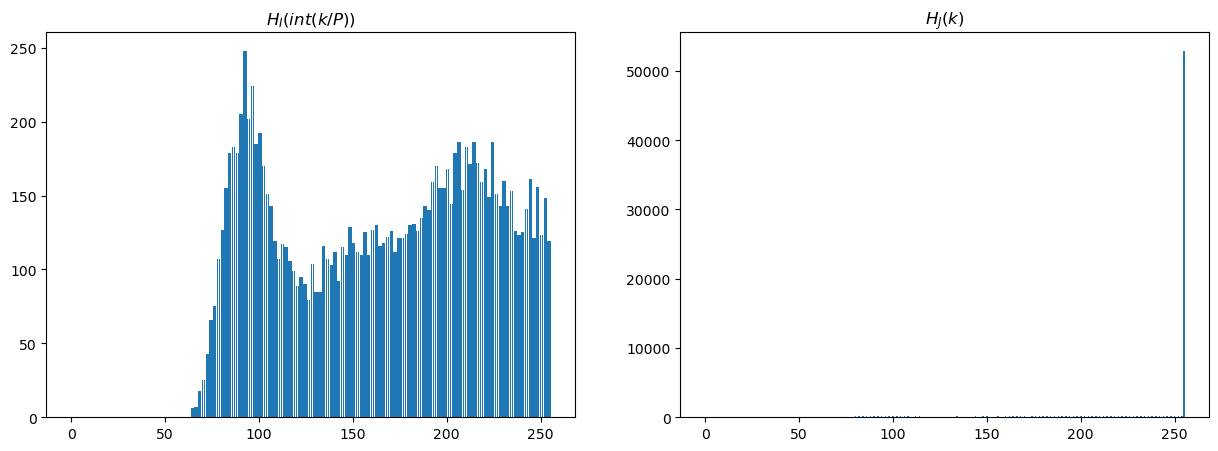

In [8]:
h = np.zeros(len(h1))
for k in range(len(h1)):
    x = int(k / P)
    if x > 255:
        h[k] = 0
    else:
        h[k] = h1[int(k / P)]
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].bar(np.arange(256), h)
axs[0].set_title('$H_{I}(int(k/P))$')
axs[1].bar(np.arange(256), h2)
axs[1].set_title('$H_{J}(k)$')
plt.show()

b)

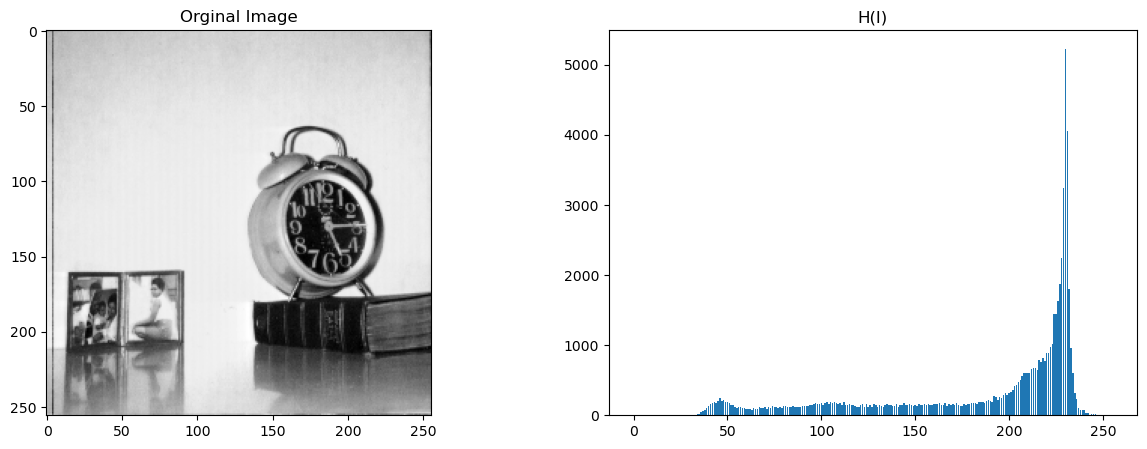

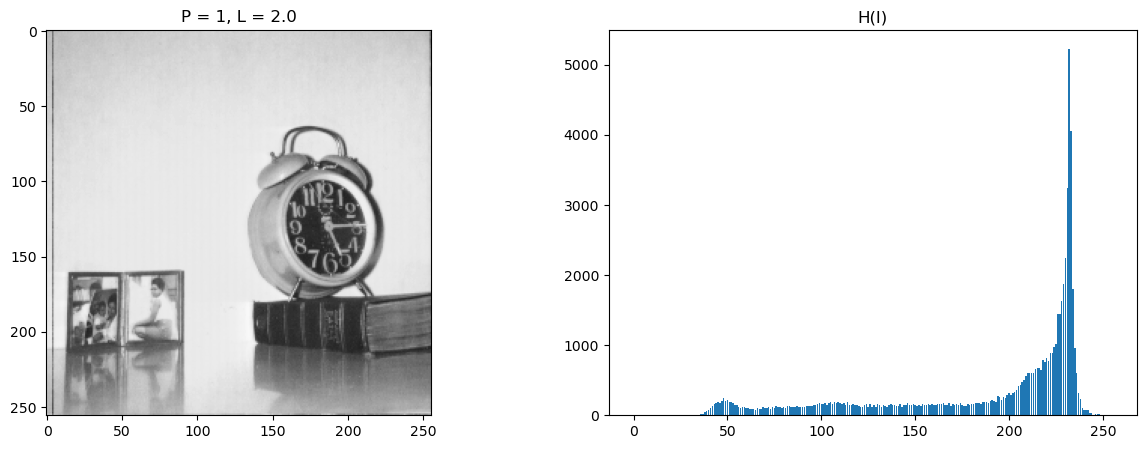

In [9]:
img = np.clip(I + L, 0, 255).astype(int)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I, cmap = 'gray')
axs[0].set_title('Orginal Image')
axs[1].bar(np.arange(256), h1)
axs[1].set_title('H(I)')
plt.show()
h2 = hist(img)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
axs[0].set_title(f'P = 1, L = {L}')
axs[1].bar(np.arange(256), h2)
axs[1].set_title('H(I)')
plt.show()

The Relation between the Histograms are: $H_{J}(k) = H_{I}(k − L)$

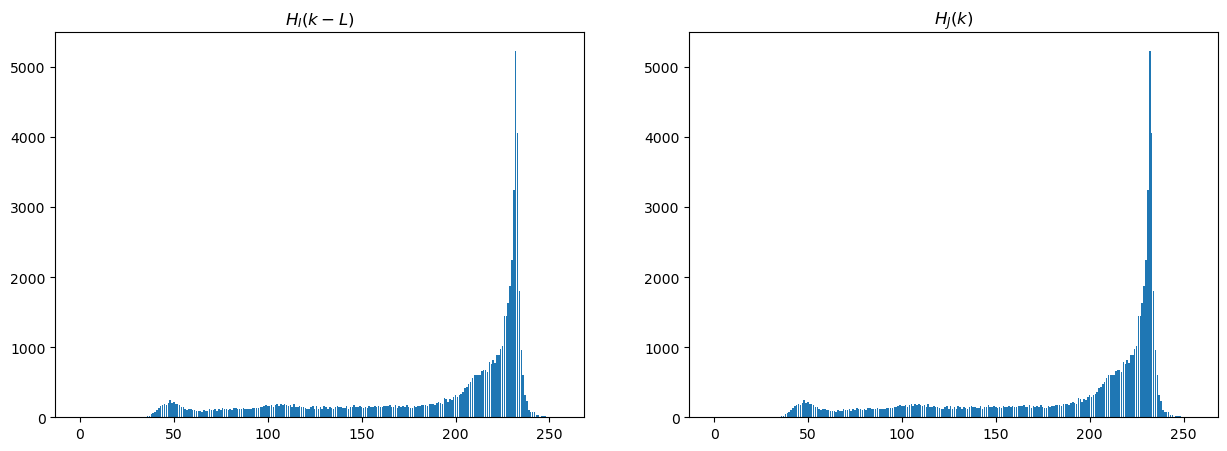

In [10]:
h = np.zeros(len(h1))
for k in range(len(h1)):
    x = int(k - L)
    if x > 255 or x < 0:
        h[k] = 0
    else:
        h[k] = h1[int(k - L)]
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].bar(np.arange(256), h)
axs[0].set_title('$H_{I}(k - L)$')
axs[1].bar(np.arange(256), h2)
axs[1].set_title('$H_{J}(k)$')
plt.show()

c)

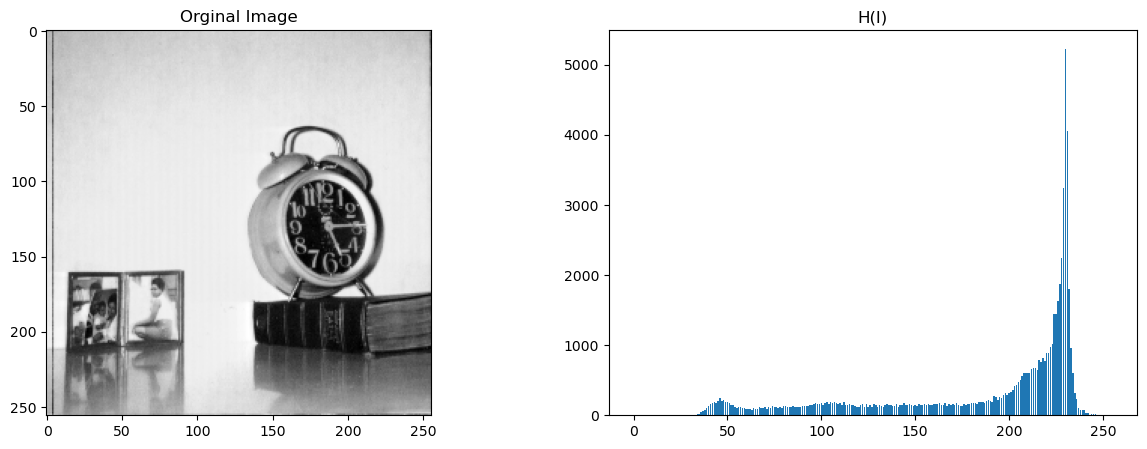

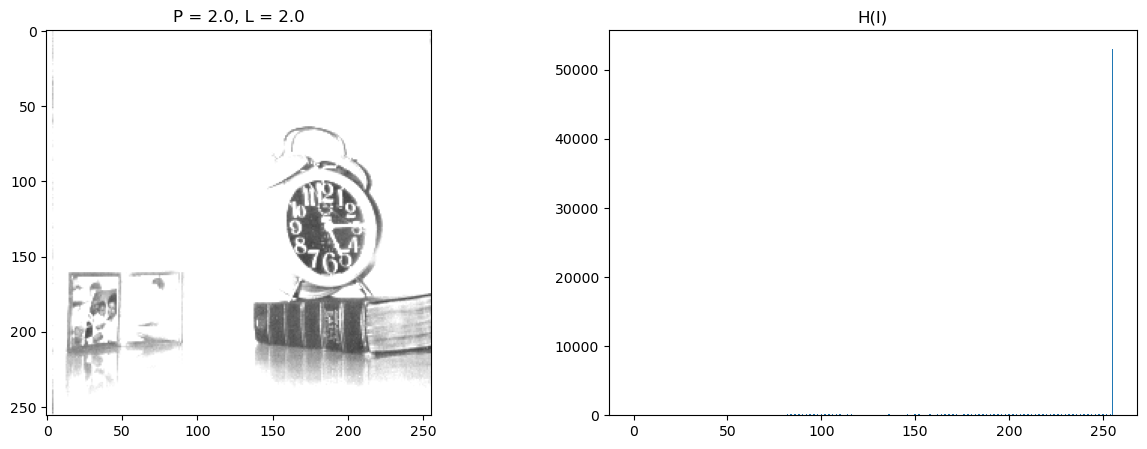

In [11]:
img = np.clip(P * I + L, 0, 255).astype(int)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I, cmap = 'gray')
axs[0].set_title('Orginal Image')
axs[1].bar(np.arange(256), hist(I))
axs[1].set_title('H(I)')
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
axs[0].set_title(f'P = {P}, L = {L}')
axs[1].bar(np.arange(256), hist(img))
axs[1].set_title('H(I)')
plt.show()

The Relation between the Histograms are: $H_{J}(k) = H_{I}(int(k/P) − L)$

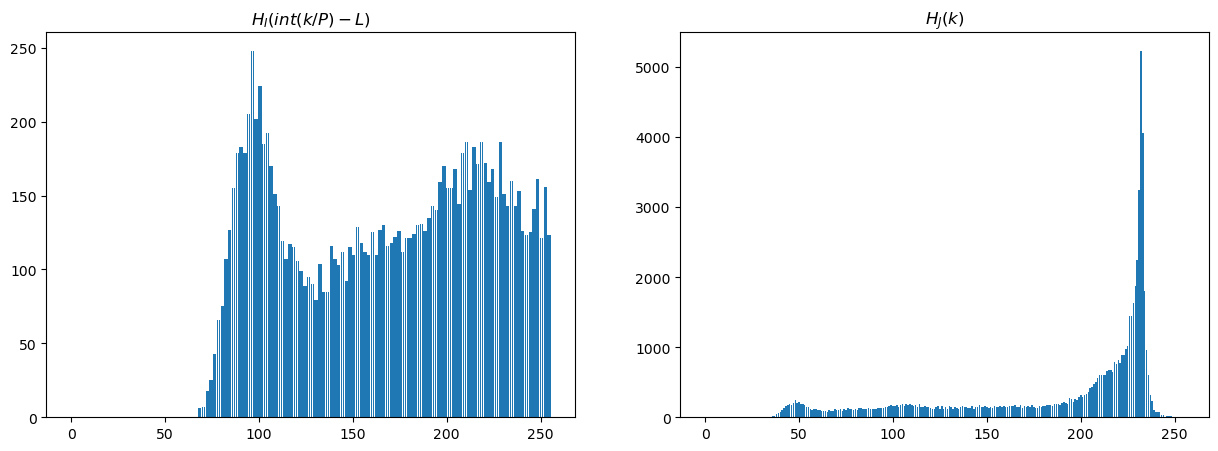

In [12]:
h = np.zeros(len(h2))
for k in range(len(h2)):
    x = int(k / P) - L
    if x > 255 or x < 0:
        h[k] = 0
    else:
        h[k] = h1[int((k / P) - L)]
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].bar(np.arange(256), h)
axs[0].set_title('$H_{I}(int(k/P) - L)$')
axs[1].bar(np.arange(256), h2)
axs[1].set_title('$H_{J}(k)$')
plt.show()

Q2

NASA IMAGE link: https://apod.nasa.gov/apod/ap231214.html

In [13]:
I = np.asarray(Image.open('img1.jpg').convert('L')).astype(int)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I, cmap = 'gray')
axs[0].set_title('Orginal Image')
axs[1].bar(np.arange(256), hist(I))
axs[1].set_title('H(I)')

def FSCS(I):
    img_min = I.min()
    img_max = I.max()
    P = 255 / (img_max - img_min)
    L = img_min * 255 / (img_min - img_max)
    img = (P * I + L).astype(int)

    return img
  
FSCS(I) 

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
axs[0].set_title(' After FSCS')
axs[1].bar(np.arange(256), hist(img))
axs[1].set_title('H(I)')
plt.show()

print(f'Before FSCS: Min = {I.min()}, Max = {I.max()}')
print(f'After FSCS: Min = {img.min()}, Max = {img.max()} ')

FileNotFoundError: [Errno 2] No such file or directory: 'img1.jpg'

Q3

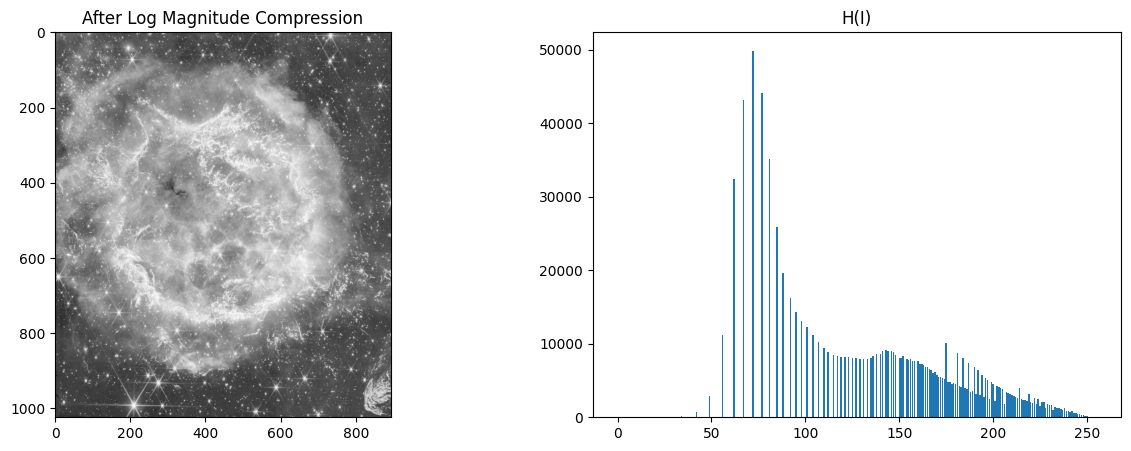

In [ ]:
def log_mag_comp(I):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    img = np.log2(1 + I)
    img = FSCS(img)
    axs[0].imshow(img, cmap = 'gray')
    axs[0].set_title('After Log Magnitude Compression')
    axs[1].bar(np.arange(256), hist(img))
    axs[1].set_title('H(I)')
    plt.show()

log_mag_comp(I)

Q4

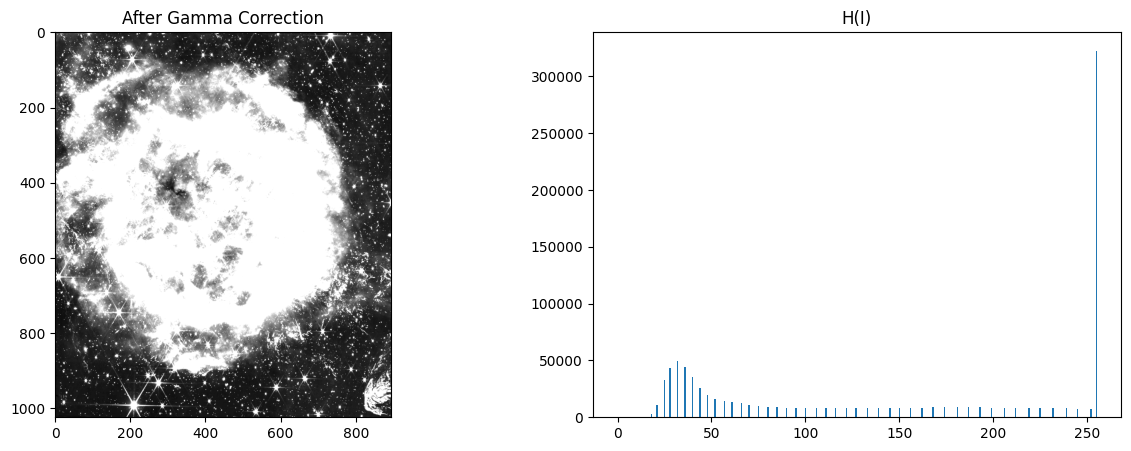

In [ ]:
def gamma_corr(I):
    gamma = 1.4
    img = np.clip(I ** gamma, 0, 255).astype(int)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img, cmap = 'gray')
    axs[0].set_title('After Gamma Correction')
    axs[1].bar(np.arange(256), hist(img))
    axs[1].set_title('H(I)')
    plt.show()

gamma_corr(I)

Q5

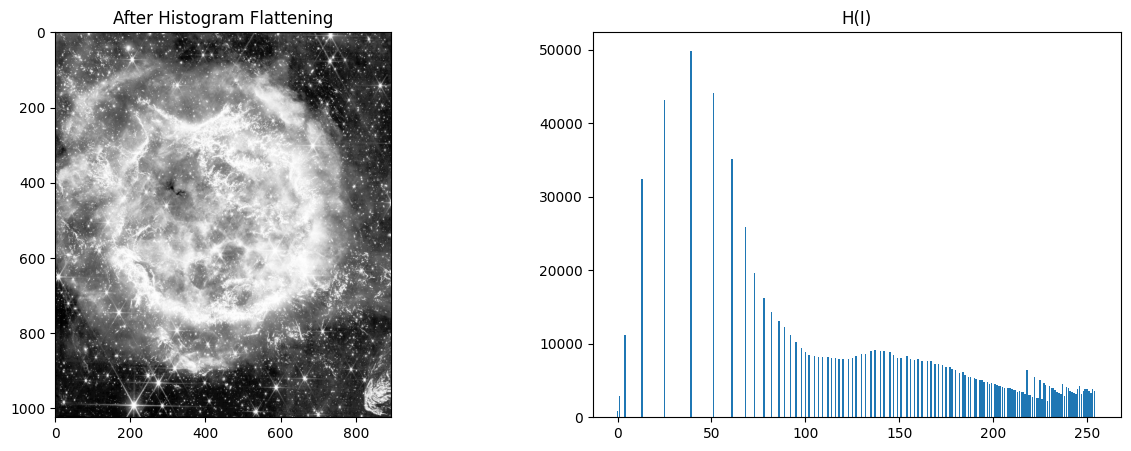

In [ ]:
def hist_flat(I):
    img = I
    M = len(img)
    N = len(img[0])
    img_hist = hist(I)
    img_cum = np.cumsum(img_hist) / (M * N)
    out = img_cum[img]
    out = FSCS(out)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(out, cmap = 'gray')
    axs[0].set_title('After Histogram Flattening')
    axs[1].bar(np.arange(256), hist(out))
    axs[1].set_title('H(I)')
    plt.show()

hist_flat(I)


NASA IMAGE 
link: https://apod.nasa.gov/apod/ap240204.html

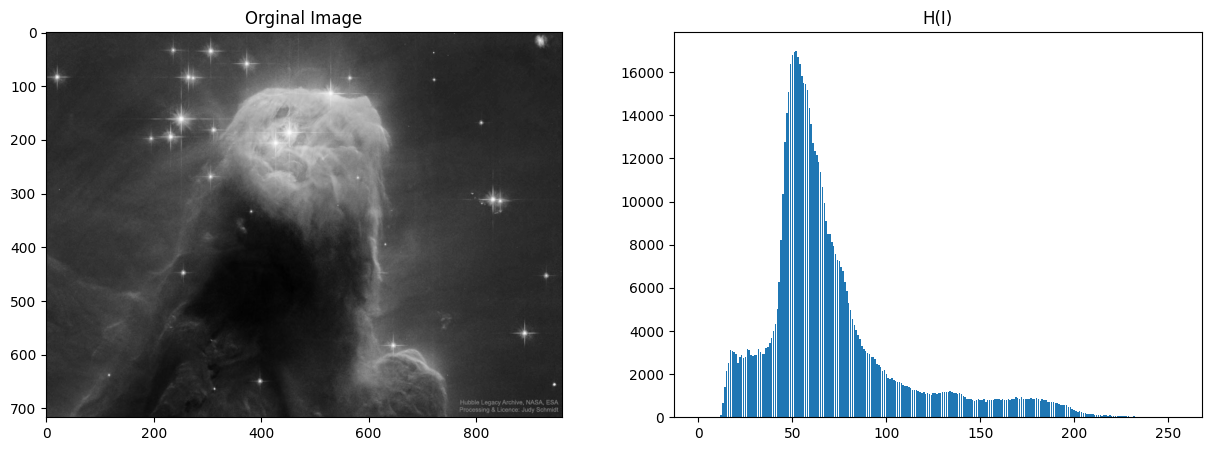

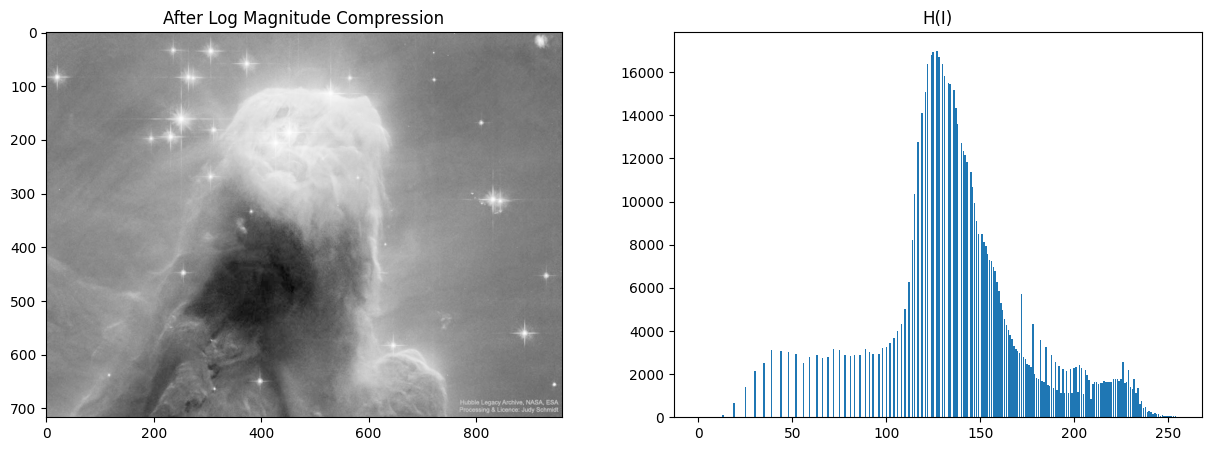

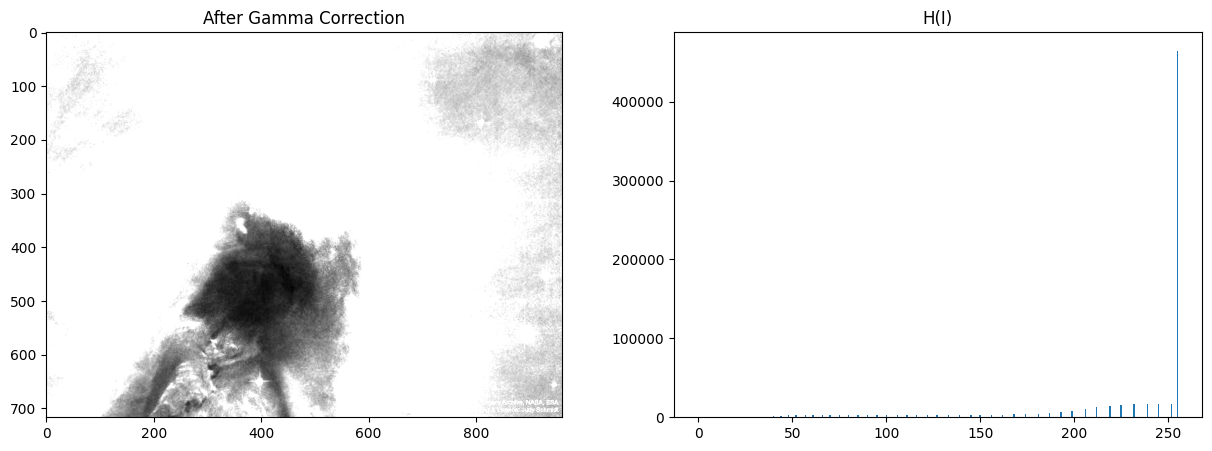

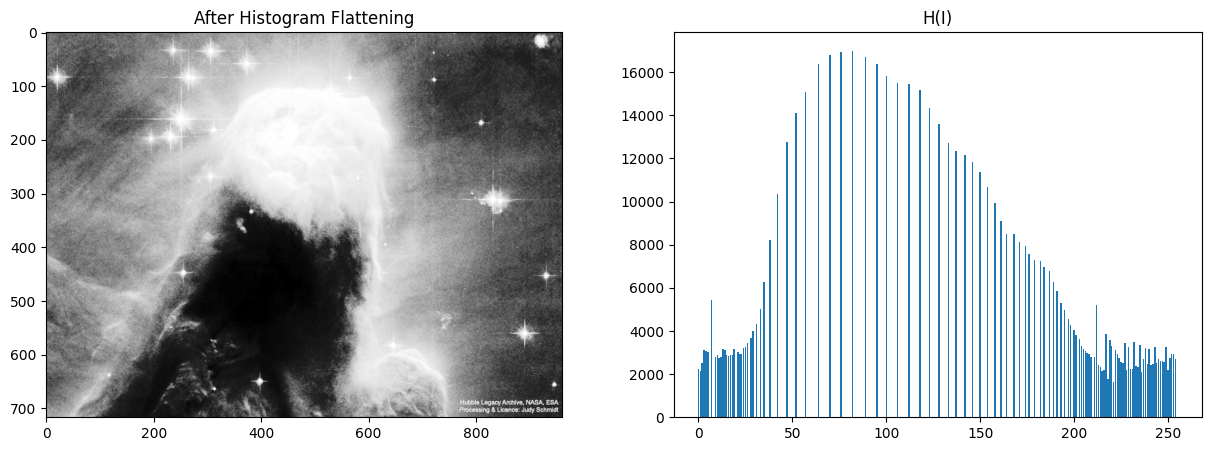

In [ ]:
I = np.asarray(Image.open('img.jpg').convert('L')).astype(int)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I, cmap = 'gray')
axs[0].set_title('Orginal Image')
axs[1].bar(np.arange(256), hist(I))
axs[1].set_title('H(I)')

log_mag_comp(I)
gamma_corr(I)
hist_flat(I)

Log Magnitude Compression: In the processed image the dim objects are now at the larger percentage of the grayscale range and the bright objects are compressed, improving their visibility. 

Gamma Correction: The brighter objects are made brighter to a greater extend than the dim ones, thus helping us view the dim objects.

Histogram Flattening: The proccessed image fills the available grayscale range almost uniformly(Smooth changes in intensity). The ideal flat histogram contains the most information and also gives a rich display. 

Part 2 - Image Zooming

Q1

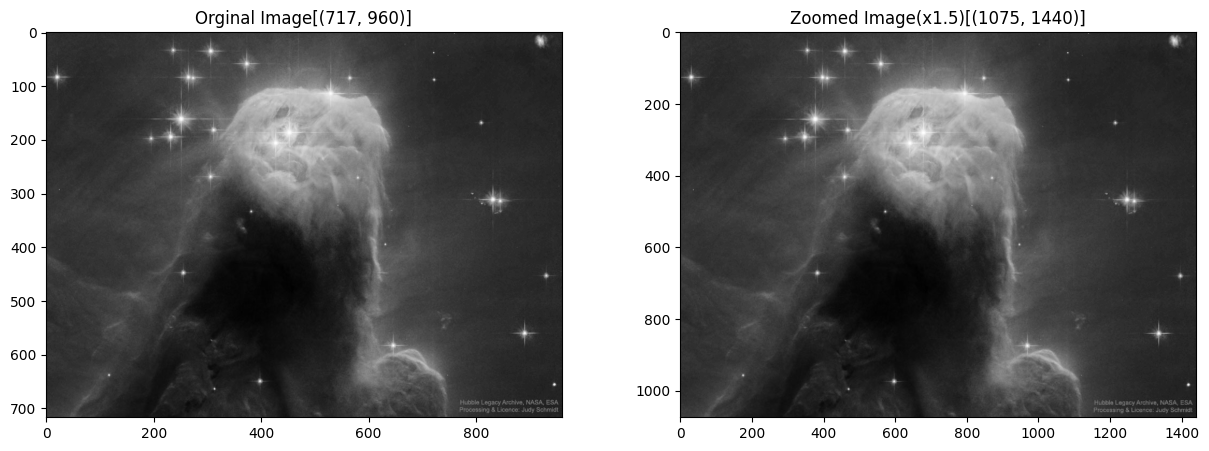

In [ ]:
def neigh_zoom(I):
    X = 1.5
    M = len(I)
    N = len(I[0])
    x = int(M * X) 
    y = int(N * X) 
    out = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            out[i][j] = I[int(i / X)][int(j / X)]
    return out

out1 = neigh_zoom(I)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I, cmap = 'gray')
axs[0].set_title(f'Orginal Image[{I.shape}]')
axs[1].imshow(out1, cmap = 'gray')
axs[1].set_title(f'Zoomed Image(x1.5)[{out1.shape}]')
plt.show()

Q2

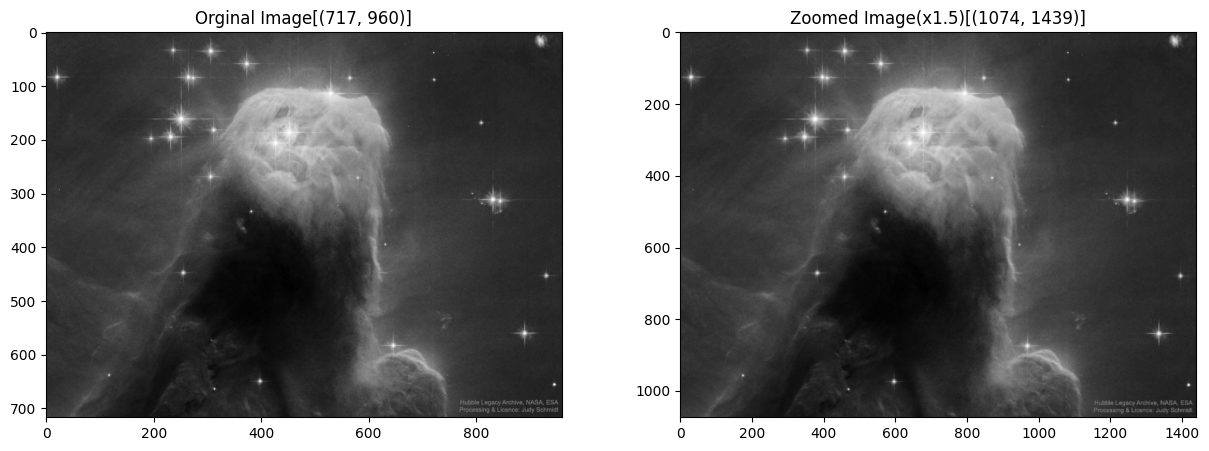

In [ ]:
def linear_zoom(I):
    X = 1.5
    M = len(I)
    N = len(I[0])
    x = int(M * X) 
    y = int(N * X) 
    out = np.zeros((x - 1, y - 1))
    for i in range(x - 1):
        for j in range(y - 1):
            a = i / X
            b = j / X
            if int(a) == a and int(b) == b:
                a1, b1 = int(a), int(b)
                out[i][j] = I[a1][b1]
            elif int(a) == a:
                a1 = int(a)
                y1 = int(b)
                y2 = int(b) + 1
                d1 = b - y1
                d2 = y2 - b
                out[i][j] = d2 * I[a1][y1] + d1 * I[a1][y2]
            elif int(b) == b:
                b1 = int(b)
                x1 = int(a)
                x2 = int(a) + 1
                d1 = a - x1
                d2 = x2 - a
                out[i][j] = d2 * I[x2][b1] + d1 * I[x1][b1]
            else:
                x1 = int(a)
                x2 = int(a) + 1
                y1 = int(b)
                y2 = int(b) + 1 
                d1 = a - x1
                d2 = x2 - a  
                d3 = b - y1
                d4 = y2 - b 
                r1 = d3 * I[x1][y1] + d4 * I[x1][y2]
                r2 = d3 * I[x2][y1] + d4 * I[x2][y2]    
                out[i][j] = d2 * r1 + d1 * r2
    
    return out.astype(int)

out2 = linear_zoom(I)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(I, cmap = 'gray')
axs[0].set_title(f'Orginal Image[{I.shape}]')
axs[1].imshow(out2, cmap = 'gray')
axs[1].set_title(f'Zoomed Image(x1.5)[{out2.shape}]')
plt.show()

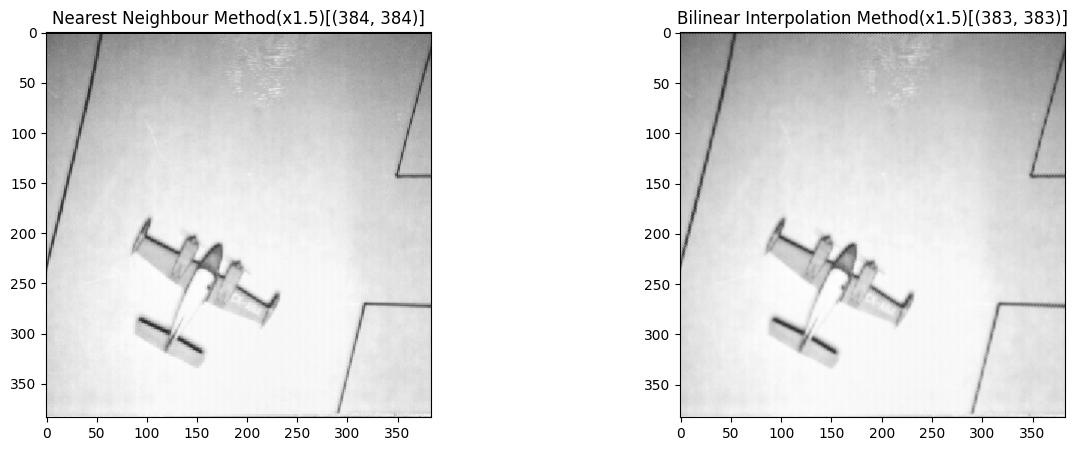

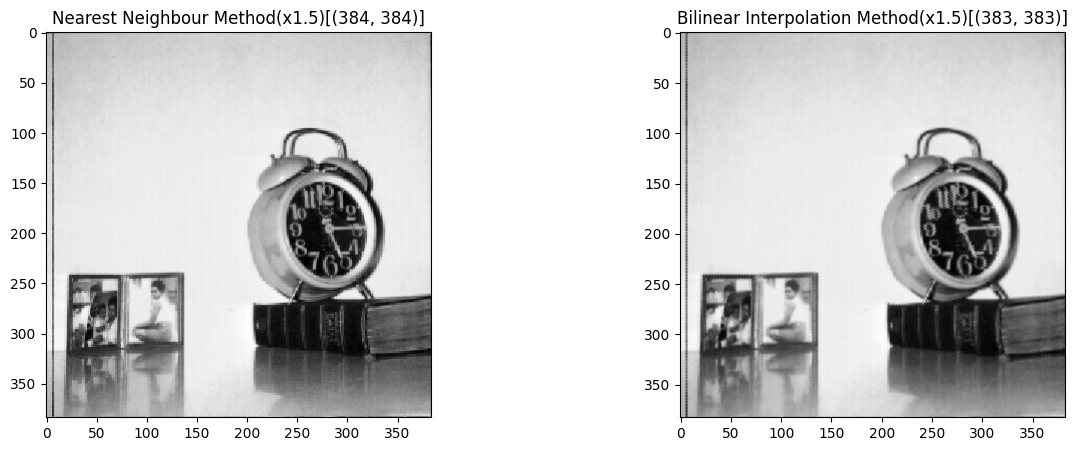

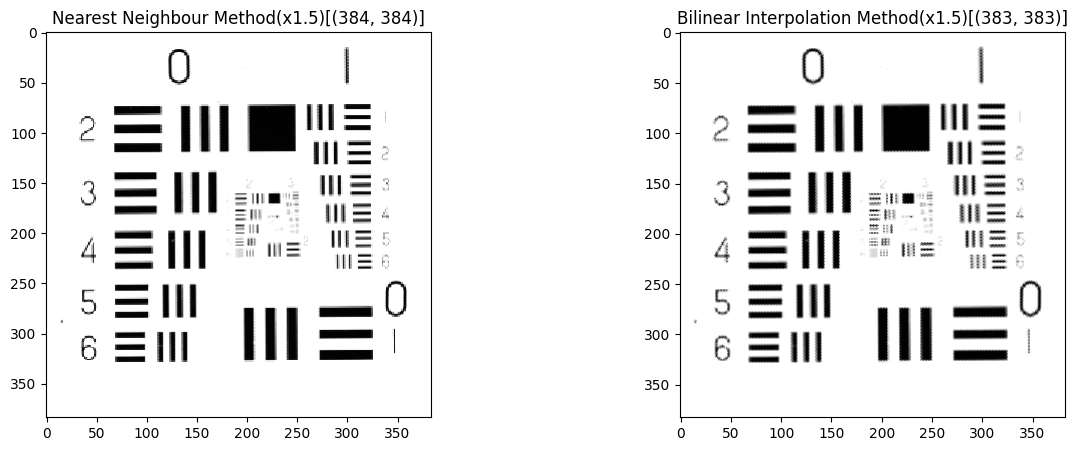

In [ ]:
for file in files:
    img = np.asarray(Image.open(file).convert('L')).astype(int)
    out1 = neigh_zoom(img)
    out2 = linear_zoom(img)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(out1, cmap = 'gray')
    axs[0].set_title(f'Nearest Neighbour Method(x1.5)[{out1.shape}]')
    axs[1].imshow(out2, cmap = 'gray')
    axs[1].set_title(f'Bilinear Interpolation Method(x1.5)[{out2.shape}]')
    plt.show()

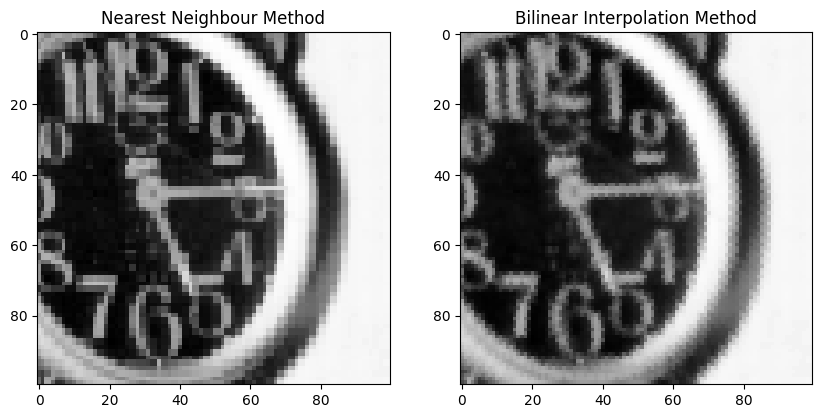

In [ ]:
img = np.asarray(Image.open(filenames[1]).convert('L')).astype(int)
out1 = neigh_zoom(img)
out2 = linear_zoom(img)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(out1[150:250, 250:350], cmap = 'gray')
axs[0].set_title(f'Nearest Neighbour Method')
axs[1].imshow(out2[150:250, 250:350], cmap = 'gray')
axs[1].set_title(f'Bilinear Interpolation Method')
plt.show()

On comparing the quality of the images we can infer that image zooming using Bilinear Interpolation is better.

Both have time complexity of O(M * N)

Part 3 - 2D-DFT

Discrete Fourier Transform Methods

Q1

In [ ]:
def DFT(I):
    N = len(I)
    F = 1j * np.zeros((N, N))
    for m in range(N):
        for n in range(N):
            for u in range(N):
                for v in range(N):
                    F[m][n] += (I[u][v] * np.exp(-2j * np.pi * (u * m / N + v * n / N)))

    return F

def IDFT(I):
    N = len(I)
    f = 1j * np.zeros((N, N))
    for m in range(N):
        for n in range(N):
            for u in range(N):
                for v in range(N):
                    f[m][n] += I[u][v] * np.exp(2j * np.pi * (u * m / N + v * n / N))
    f /= (N * N)
    return np.round(f).real

Q2

In [ ]:
def Mat_DFT(I):
    N = len(I)
    w = np.exp(-2j * np.pi / N)
    W = 1j * np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            W[i][j] = np.power(w, (i * j))
            
    F = np.matmul(W, np.matmul(I, W))
    return F

def Mat_IDFT(I):
    N = len(I)
    w = np.exp(-2j * np.pi / N)
    W = 1j * np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            W[i][j] = np.power(w, (i * j))
    W_inv = np.linalg.inv(W)
    
    f = np.matmul(W_inv, np.matmul(I, W_inv))
    return np.round(f).real

Questions Based on Above 

Q1

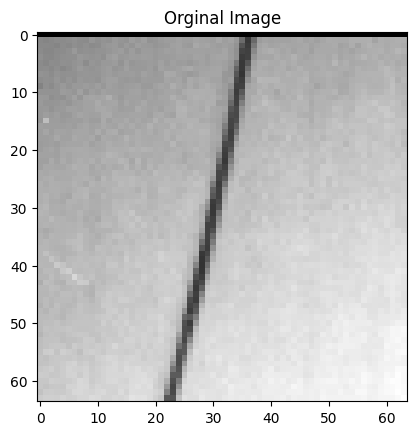

DFT using First Principles


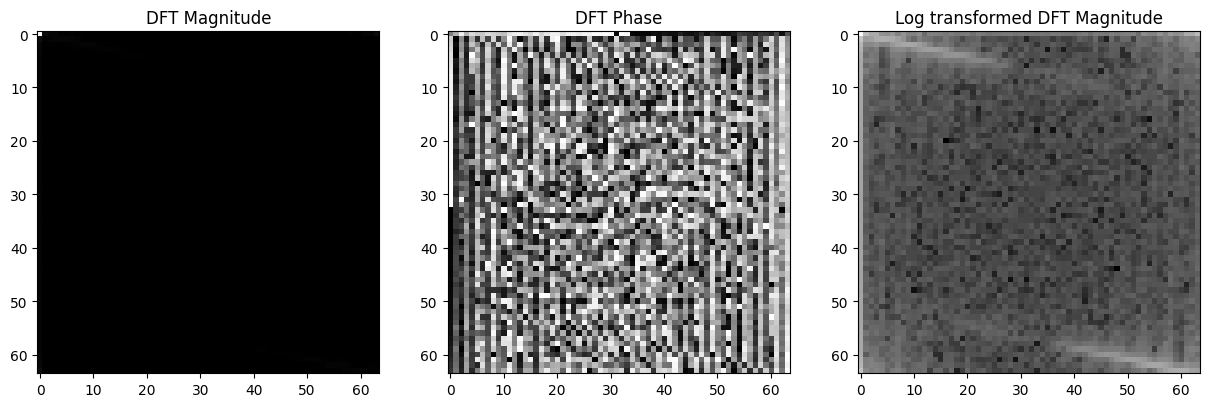

DFT using Matrix


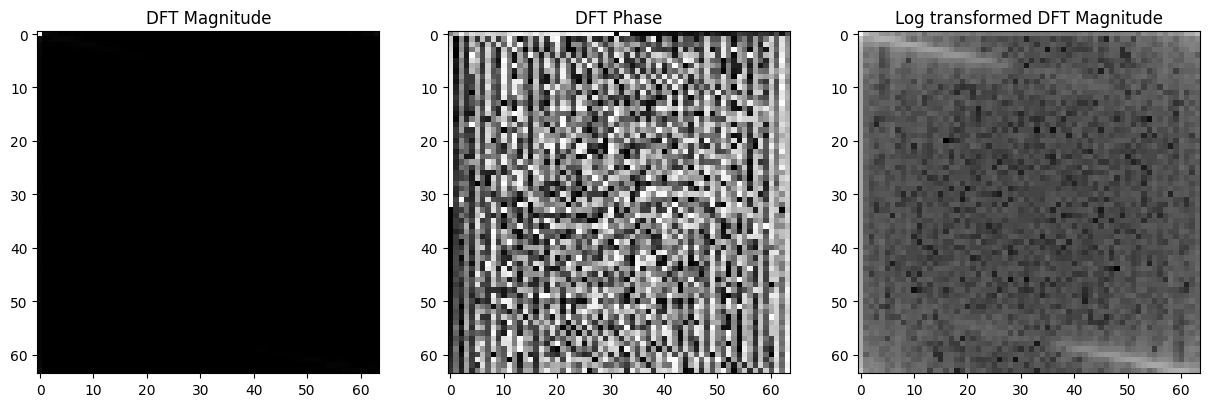

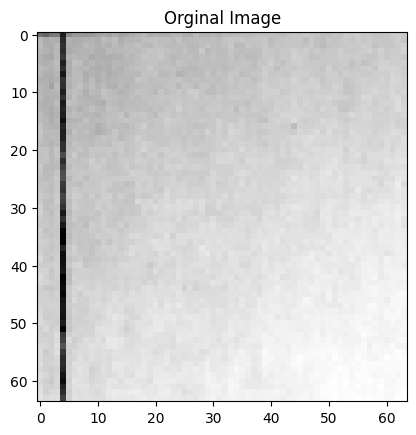

DFT using First Principles


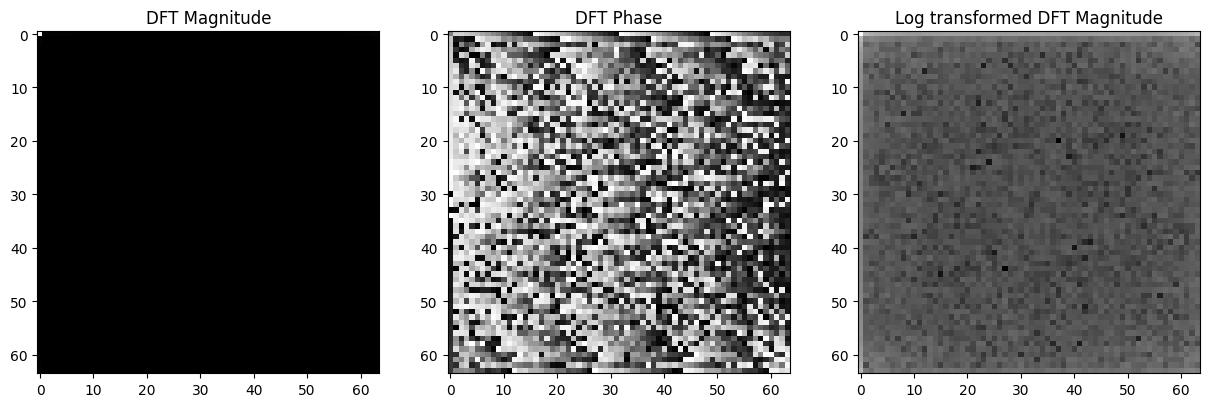

DFT using Matrix


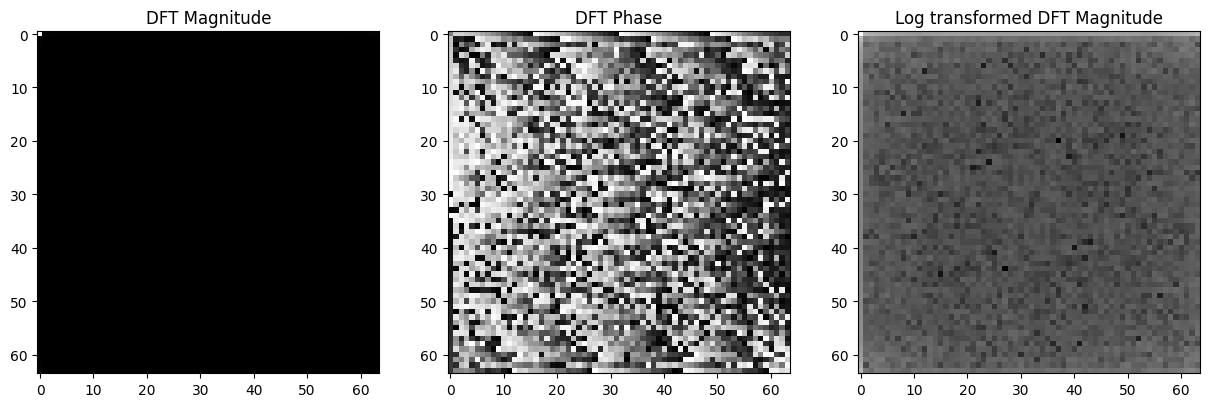

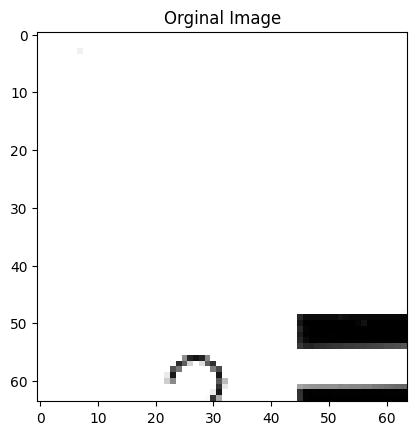

DFT using First Principles


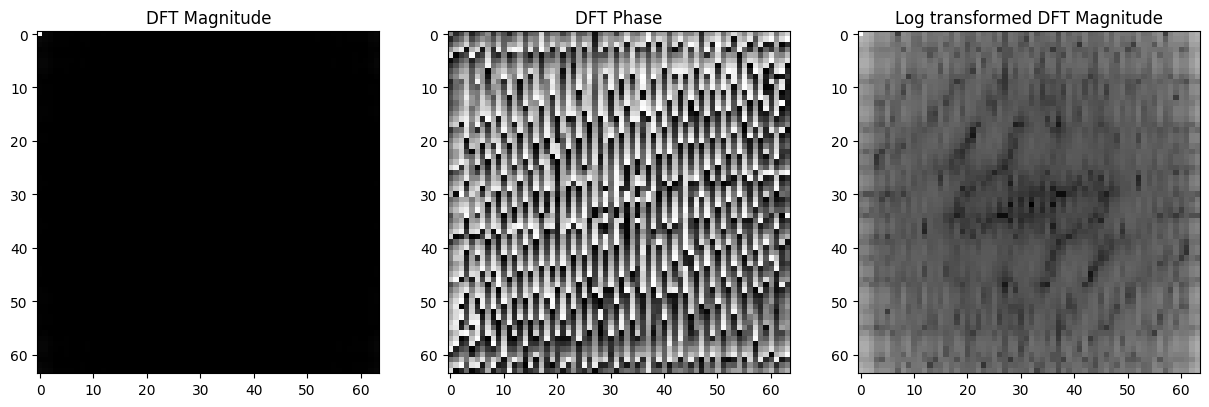

DFT using Matrix


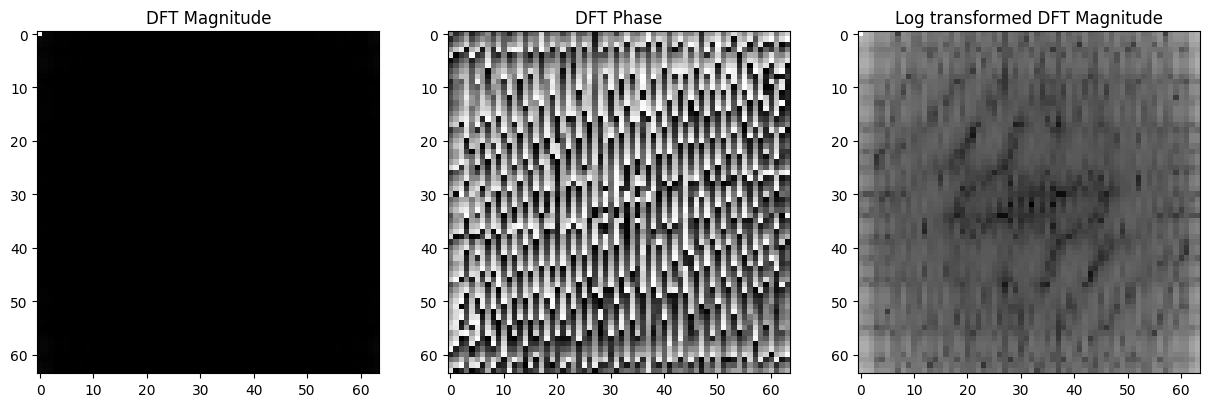

In [ ]:
for file in files:
    img = np.asarray(Image.open(file).convert('L')).astype(int)[:64, :64]
    F1 = DFT(img)
    F1_mag = np.absolute(F1)
    F1_ph = np.angle(F1)
    F1_log = FSCS(np.log(1 + F1_mag))
    F2 = Mat_DFT(img)
    F2_mag = np.absolute(F2)
    F2_ph = np.angle(F2)
    F2_log = FSCS(np.log(1 + F2_mag))

    plt.imshow(img, cmap = 'gray')
    plt.title('Orginal Image')
    plt.show()
    print('DFT using First Principles')
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(F1_mag, cmap = 'gray')
    axs[0].set_title('DFT Magnitude')
    axs[1].imshow(F1_ph, cmap = 'gray')
    axs[1].set_title('DFT Phase')
    axs[2].imshow(F1_log, cmap = 'gray')
    axs[2].set_title('Log transformed DFT Magnitude')
    plt.show()
    print('DFT using Matrix')
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(F2_mag, cmap = 'gray')
    axs[0].set_title('DFT Magnitude')
    axs[1].imshow(F2_ph, cmap = 'gray')
    axs[1].set_title('DFT Phase')
    axs[2].imshow(F2_log, cmap = 'gray')
    axs[2].set_title('Log transformed DFT Magnitude')
    plt.show()    


Q2

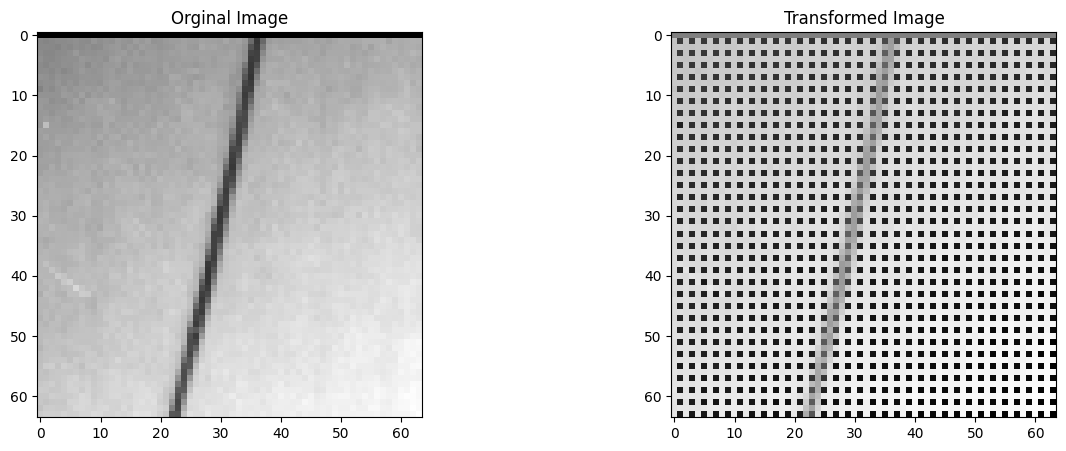

DFT using First Principles


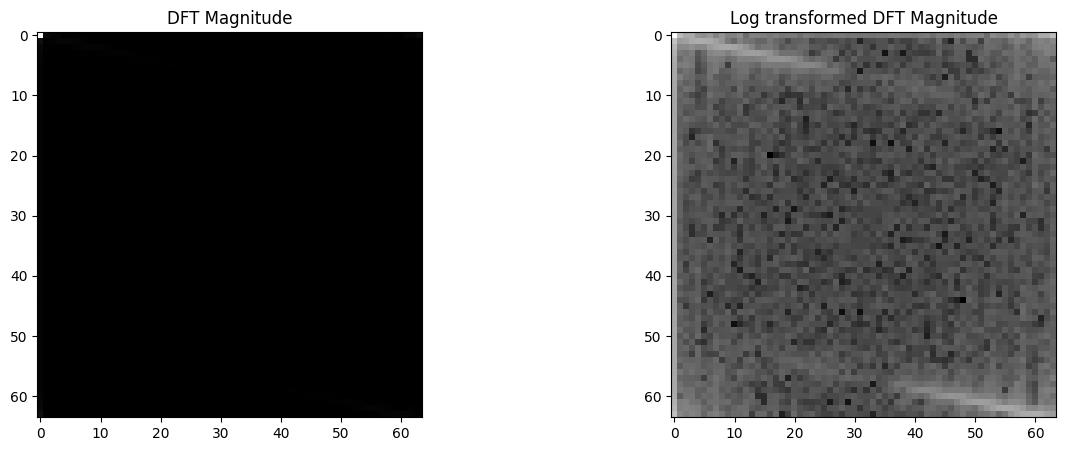

DFT using Matrix


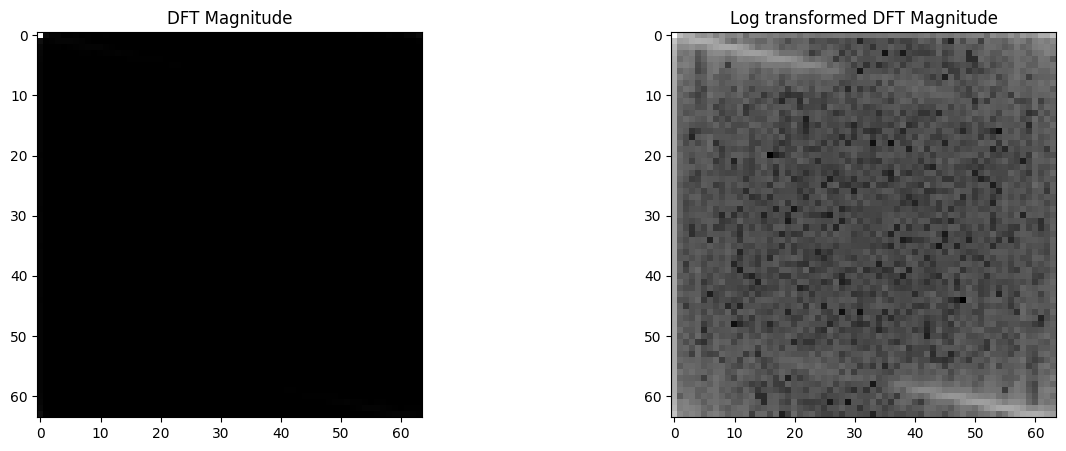

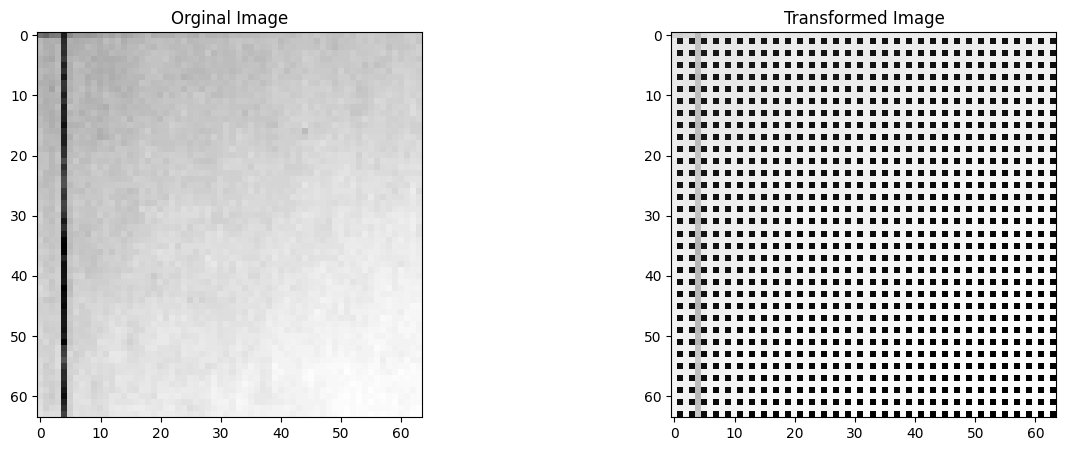

DFT using First Principles


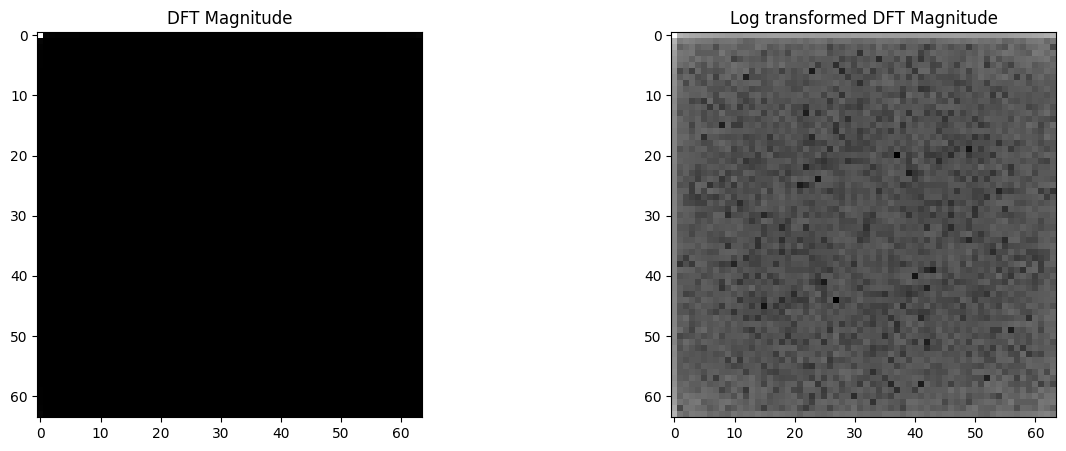

DFT using Matrix


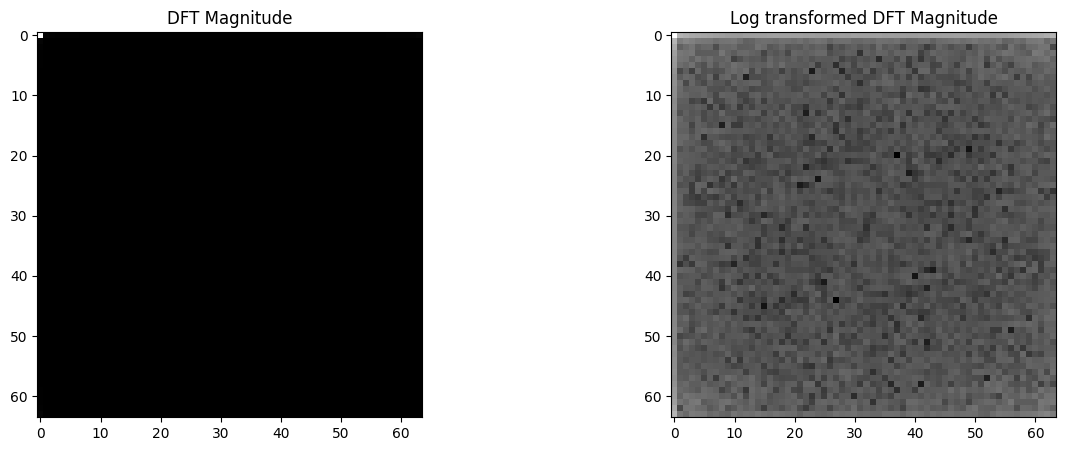

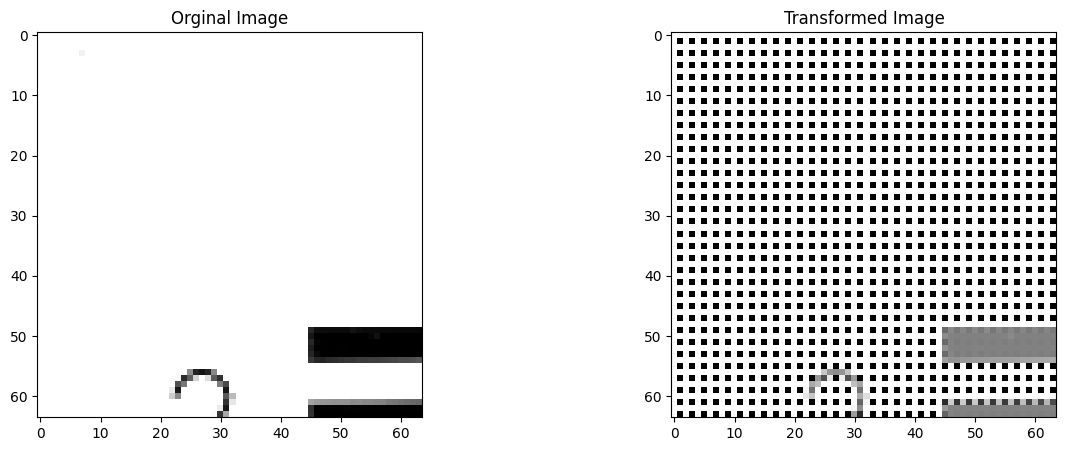

DFT using First Principles


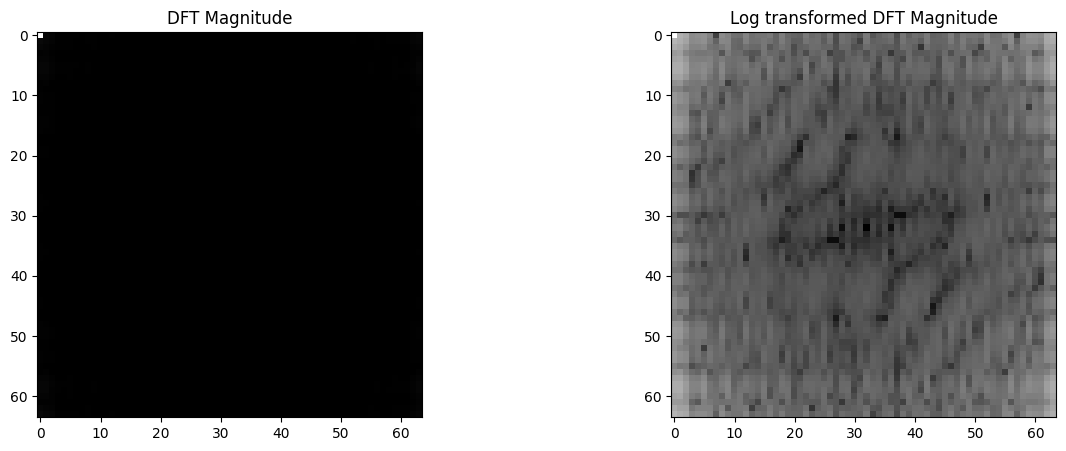

DFT using Matrix


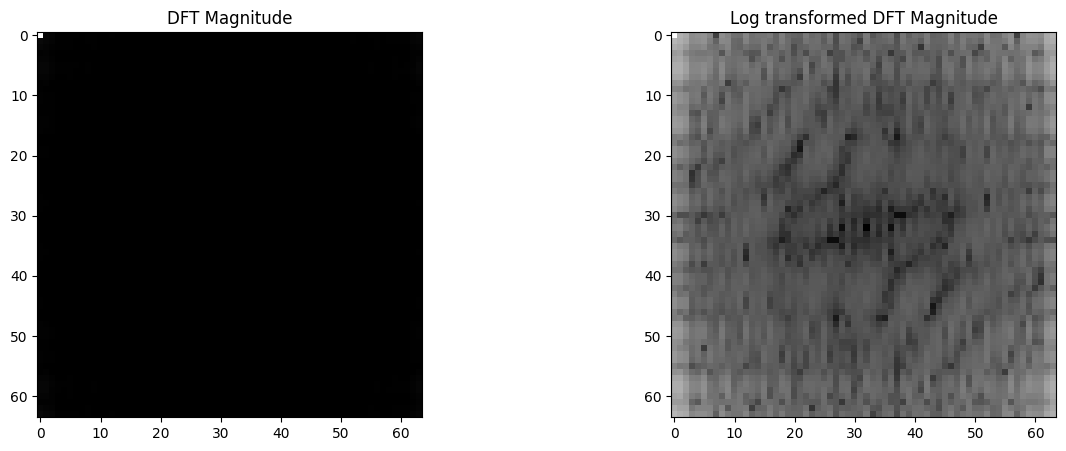

In [ ]:
for file in filenames:
    img = np.asarray(Image.open(file).convert('L')).astype(int)[:64, :64]
    X = np.zeros((len(img), len(img[0])))
    for i in range(len(img)):
        for j in range(len(img[0])):
            X[i][j] = (-1) ** (i * j) * img[i][j]

    F1 = DFT(img)
    F1_mag = np.absolute(F1)
    F1_log = FSCS(np.log(1 + F1_mag))
    F2 = Mat_DFT(img)
    F2_mag = np.absolute(F2)
    F2_log = FSCS(np.log(1 + F2_mag))

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img, cmap = 'gray')
    axs[0].set_title('Orginal Image')
    axs[1].imshow(X, cmap = 'gray')
    axs[1].set_title('Transformed Image')
    plt.show()
    print('DFT using First Principles')
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(F1_mag, cmap = 'gray')
    axs[0].set_title('DFT Magnitude')
    axs[1].imshow(F1_log, cmap = 'gray')
    axs[1].set_title('Log transformed DFT Magnitude')
    plt.show()
    print('DFT using Matrix')
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(F2_mag, cmap = 'gray')
    axs[0].set_title('DFT Magnitude')
    axs[1].imshow(F2_log, cmap = 'gray')
    axs[1].set_title('Log transformed DFT Magnitude')
    plt.show()  

Q3

In [ ]:
flag = 1
for file in files:
    img = np.asarray(Image.open(file).convert('L')).astype(int)[:64, :64]
    if not np.array_equal(IDFT(DFT(img)), img) and np.array_equal(Mat_IDFT(DFT(img)), img):
        print('IDFT[DFT[I]] != I')
        flag = 0
        break
if flag == 1:
    print('IDFT[DFT[I]] = I') 

IDFT[DFT[I]] = I


Q4

DFT using First Principles


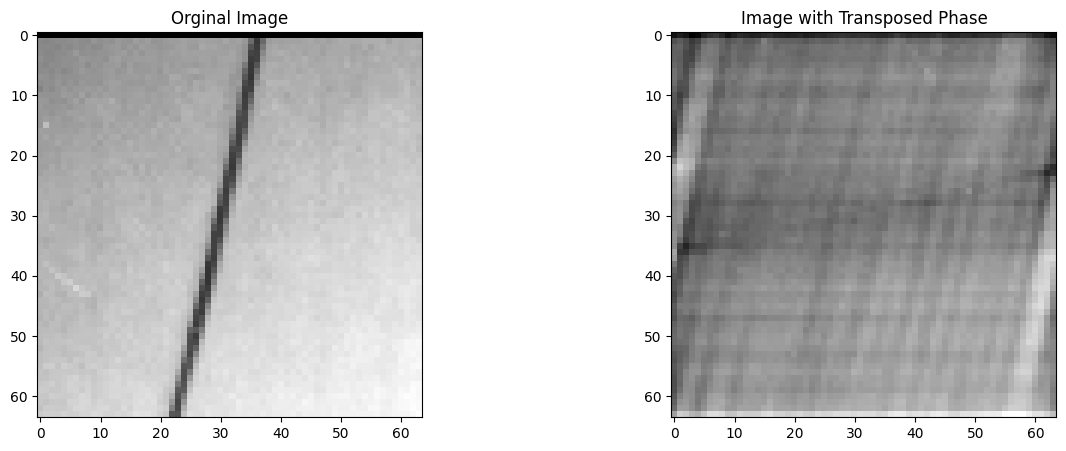

DFT using Matrix


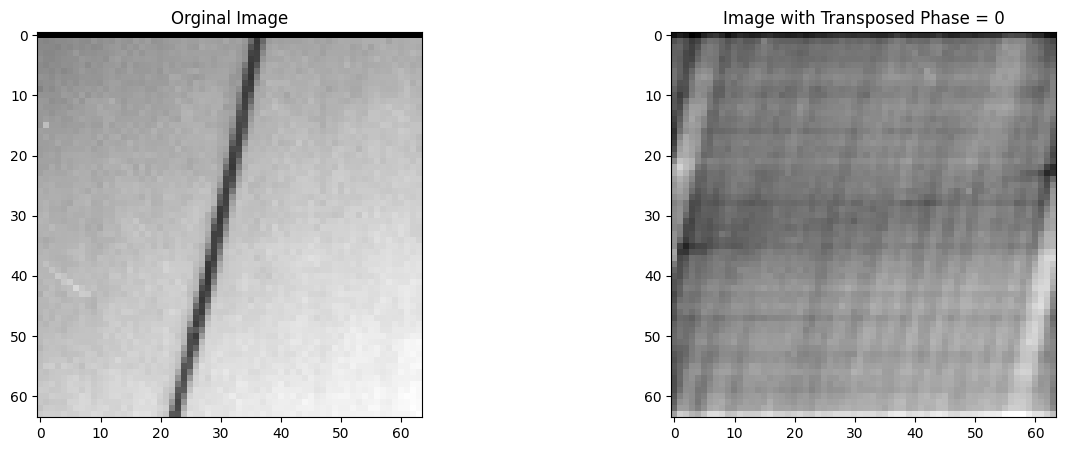

DFT using First Principles


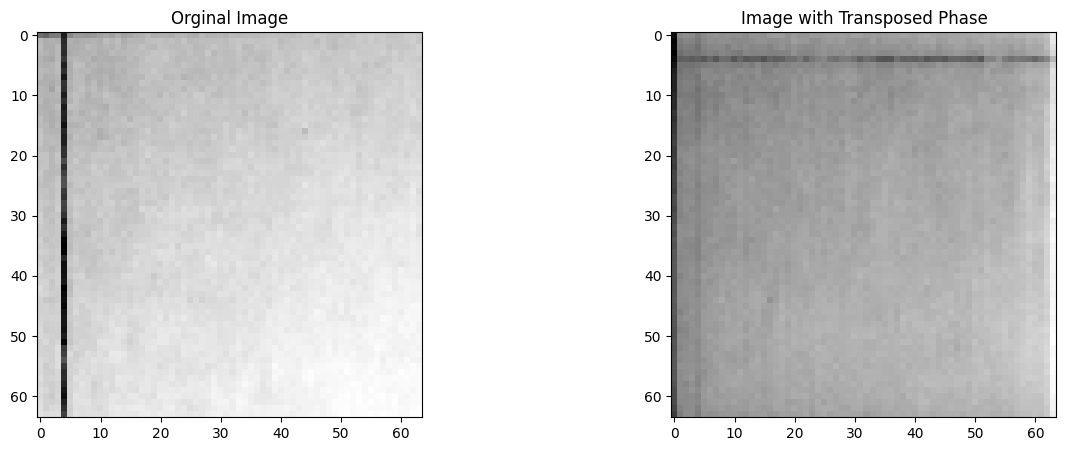

DFT using Matrix


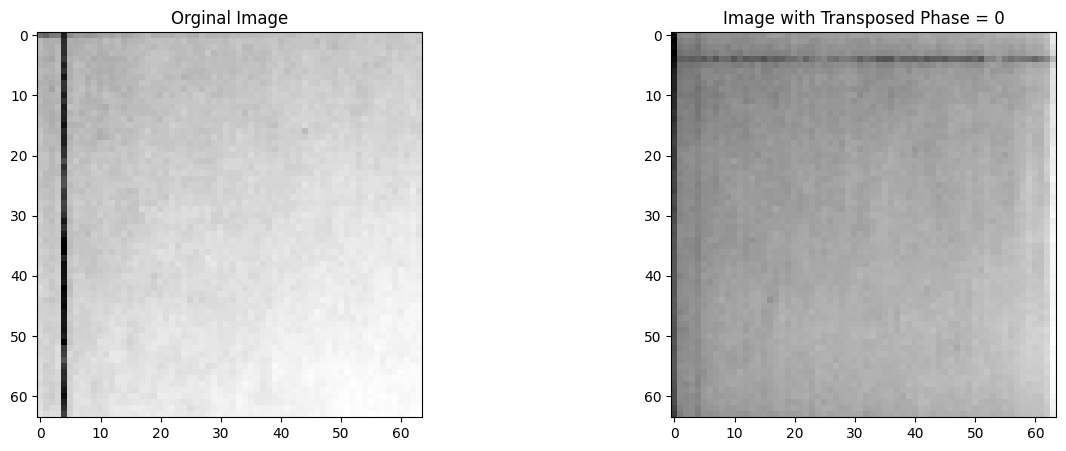

DFT using First Principles


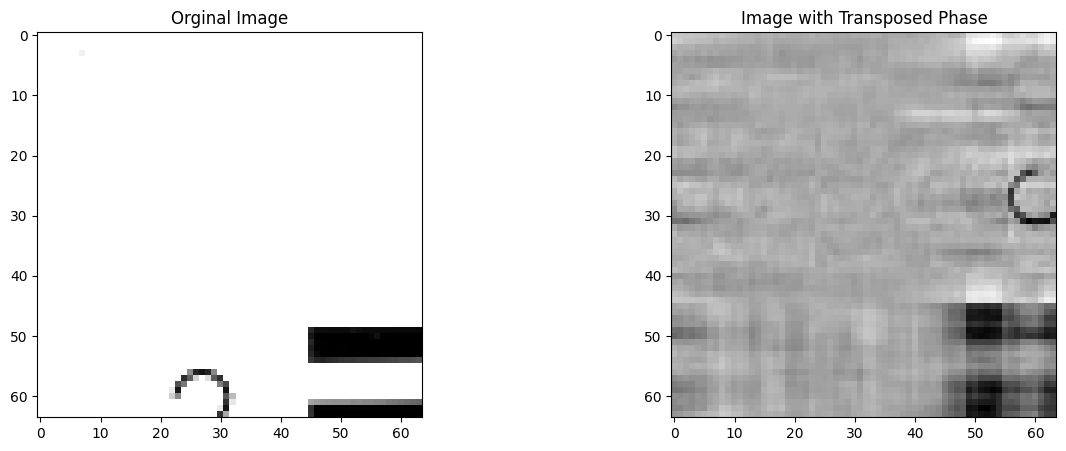

DFT using Matrix


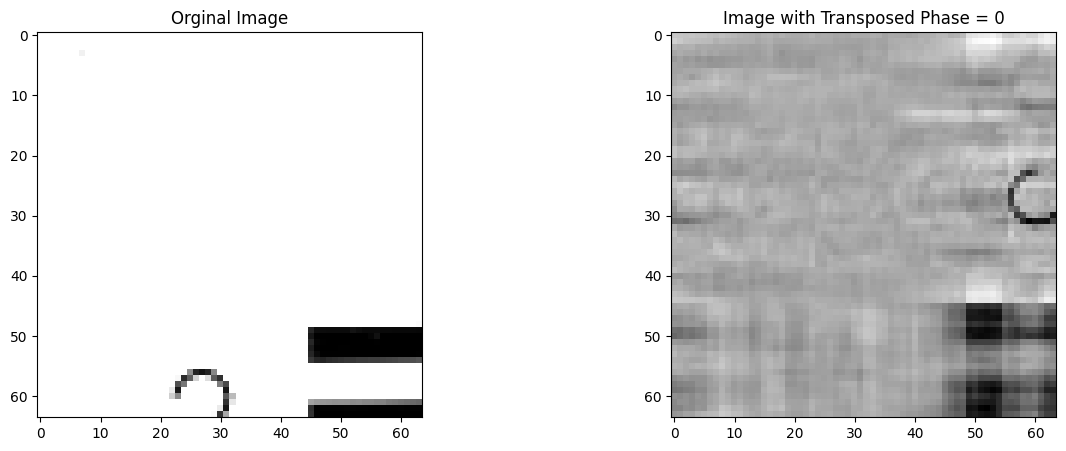

In [ ]:
for file in filenames:
    img = np.asarray(Image.open(file).convert('L')).astype(int)[:64, :64]
    F1 = DFT(img)
    F1_mag = np.absolute(F1)
    F1_ph = np.angle(F1)
    F1_ph_t = np.transpose(F1_ph)
    F1_t = IDFT(F1_mag * np.exp(1j * F1_ph_t))
    print('DFT using First Principles')
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img, cmap = 'gray')
    axs[0].set_title('Orginal Image')
    axs[1].imshow(F1_t, cmap = 'gray')
    axs[1].set_title('Image with Transposed Phase')
    plt.show()
    print('DFT using Matrix')
    F2 = Mat_DFT(img)
    F2_mag = np.absolute(F2)
    F2_ph = np.angle(F2)
    F2_ph_t = np.transpose(F2_ph)
    F2_t = IDFT(F2_mag * np.exp(1j * F2_ph_t))
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img, cmap = 'gray')
    axs[0].set_title('Orginal Image')
    axs[1].imshow(F2_t, cmap = 'gray')
    axs[1].set_title('Image with Transposed Phase = 0')
    plt.show()


a)

In [ ]:
for file in files:
    img = np.asarray(Image.open(file).convert('L')).astype(int)[:64, :64]
    F1 = DFT(img)
    F1_mag = np.absolute(F1)
    F1_0 = IDFT(F1_mag)
    print('DFT using First Principles')
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img, cmap = 'gray')
    axs[0].set_title('Orginal Image')
    axs[1].imshow(F1_0, cmap = 'gray')
    axs[1].set_title('Image with Phase = 0')
    plt.show()
    print('DFT using Matrix')
    F2 = Mat_DFT(img)
    F2_mag = np.absolute(F2)
    F2_0 = Mat_IDFT(F2_mag)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img, cmap = 'gray')
    axs[0].set_title('Orginal Image')
    axs[1].imshow(F2_0, cmap = 'gray')
    axs[1].set_title('Image with Phase = 0')
    plt.show()

KeyboardInterrupt: 

b)

DFT using First Principles


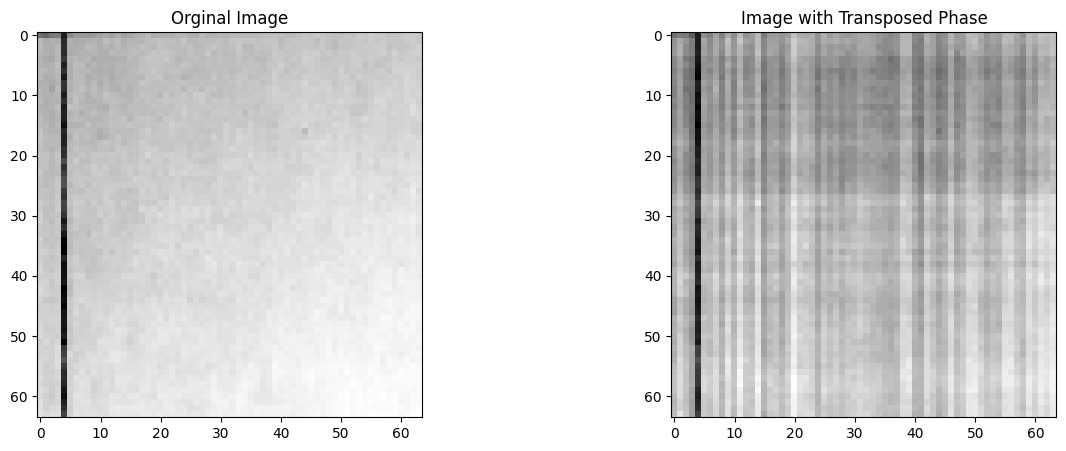

DFT using Matrix


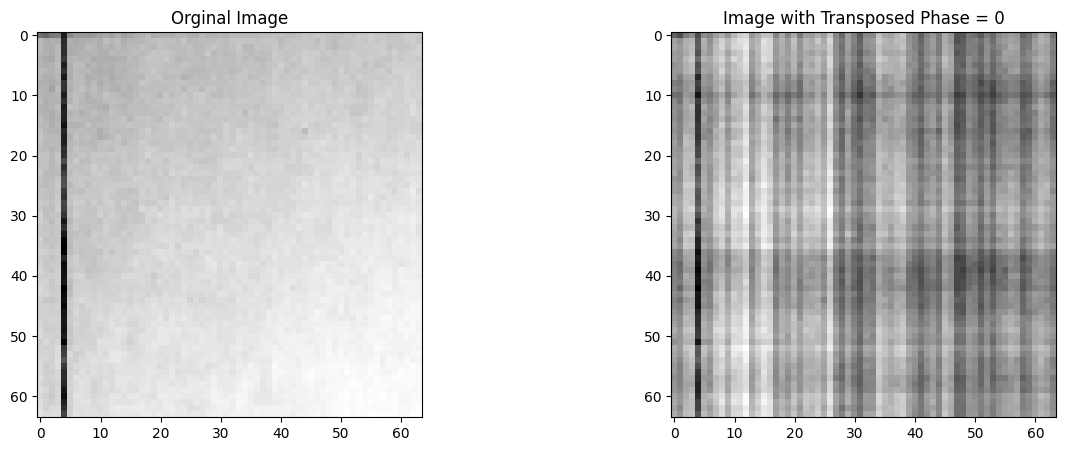

DFT using First Principles


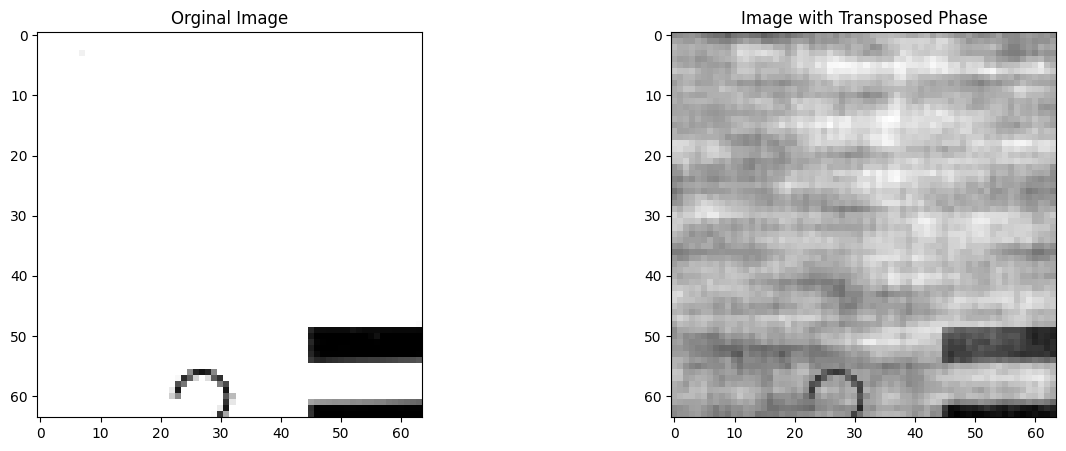

DFT using Matrix


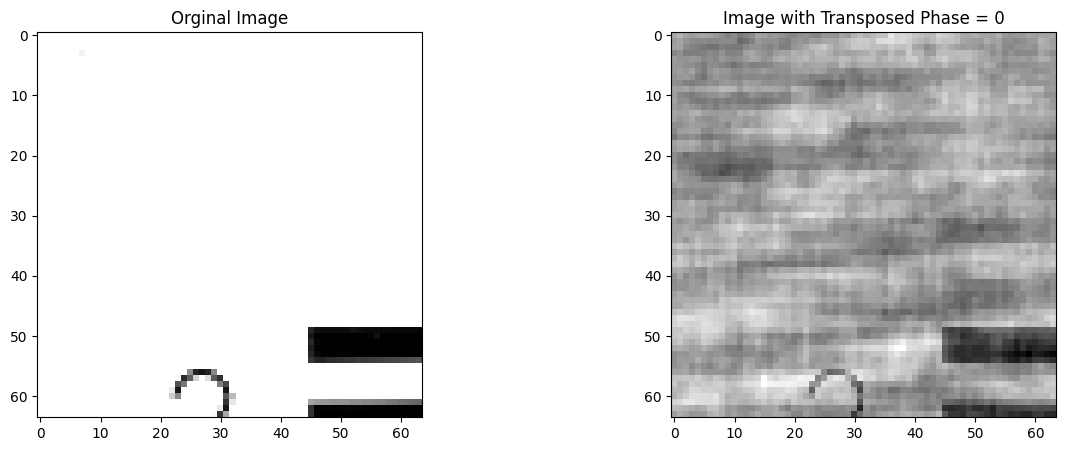

DFT using First Principles


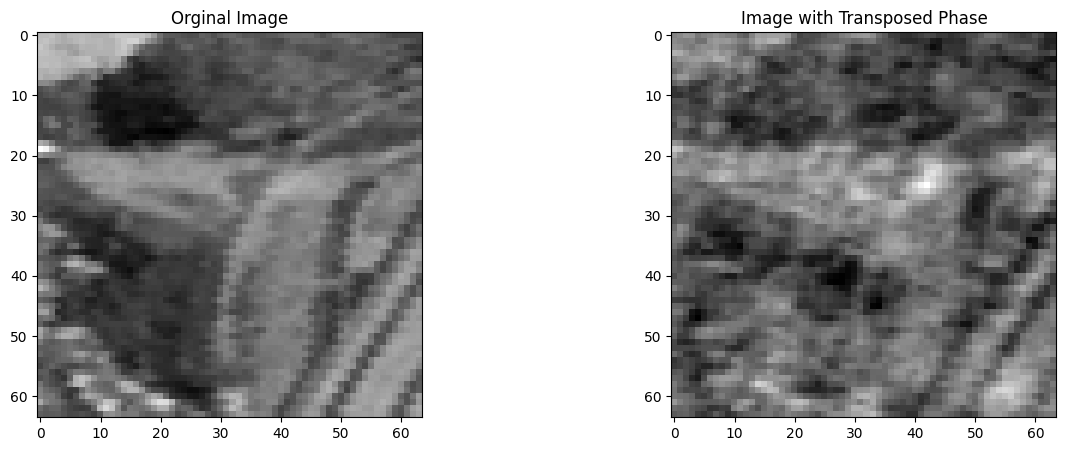

DFT using Matrix


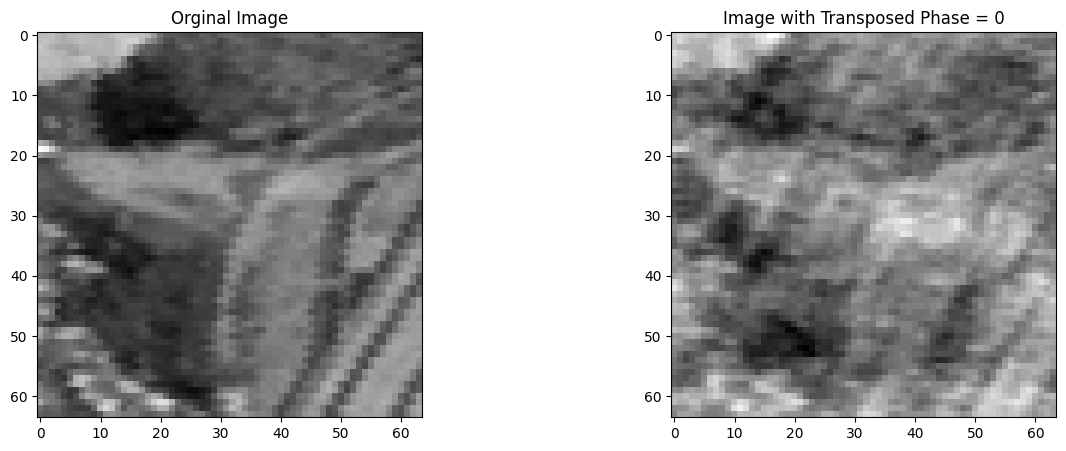

In [ ]:
for file in filenames:
    img = np.asarray(Image.open(file).convert('L')).astype(int)[:64, :64]
    F1 = DFT(img)
    F1_mag = np.absolute(F1)
    F1_ph = np.angle(F1)
    F1_ph_n = F1_ph + np.random.poisson(size = (len(F1_ph), len(F1_ph[0])))
    F1_t = IDFT(F1_mag * np.exp(1j * F1_ph_n))
    print('DFT using First Principles')
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img, cmap = 'gray')
    axs[0].set_title('Orginal Image')
    axs[1].imshow(F1_t, cmap = 'gray')
    axs[1].set_title('Image with Noise(Poisson)')
    plt.show()
    print('DFT using Matrix')
    F2 = Mat_DFT(img)
    F2_mag = np.absolute(F2)
    F2_ph = np.angle(F2)
    F2_ph_n = F2_ph + np.random.poisson(size = (len(F1_ph), len(F1_ph[0])))
    F2_t = IDFT(F2_mag * np.exp(1j * F2_ph_n))
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img, cmap = 'gray')
    axs[0].set_title('Orginal Image')
    axs[1].imshow(F2_t, cmap = 'gray')
    axs[1].set_title('Image with Noise(Poisson)')
    plt.show()
